In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
#Cargamos los datos

bajada = pd.read_csv("positionsvsValue.csv")

In [3]:
df = bajada.copy()
df.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8


In [4]:
df.describe()

,Season,Squad,Average Age,Non-Homegrown,Squad Value,GD,Points,Position
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2013.000000,36.304545,24.793636,22.886364,225.792909,0.000000,52.245455,10.500000
std,3.169489,5.410372,1.136427,5.377171,183.079602,27.061405,17.569788,5.779431
min,2008.000000,21.000000,21.300000,8.000000,22.500000,-54.000000,16.000000,1.000000
25%,2010.000000,33.000000,23.975000,19.000000,99.662500,-20.000000,40.000000,5.750000
50%,2013.000000,36.000000,24.800000,22.000000,158.275000,-7.000000,47.000000,10.500000
75%,2016.000000,40.000000,25.500000,26.000000,299.782500,20.250000,64.250000,15.250000
max,2018.000000,54.000000,28.100000,41.000000,1000.100000,79.000000,100.000000,20.000000


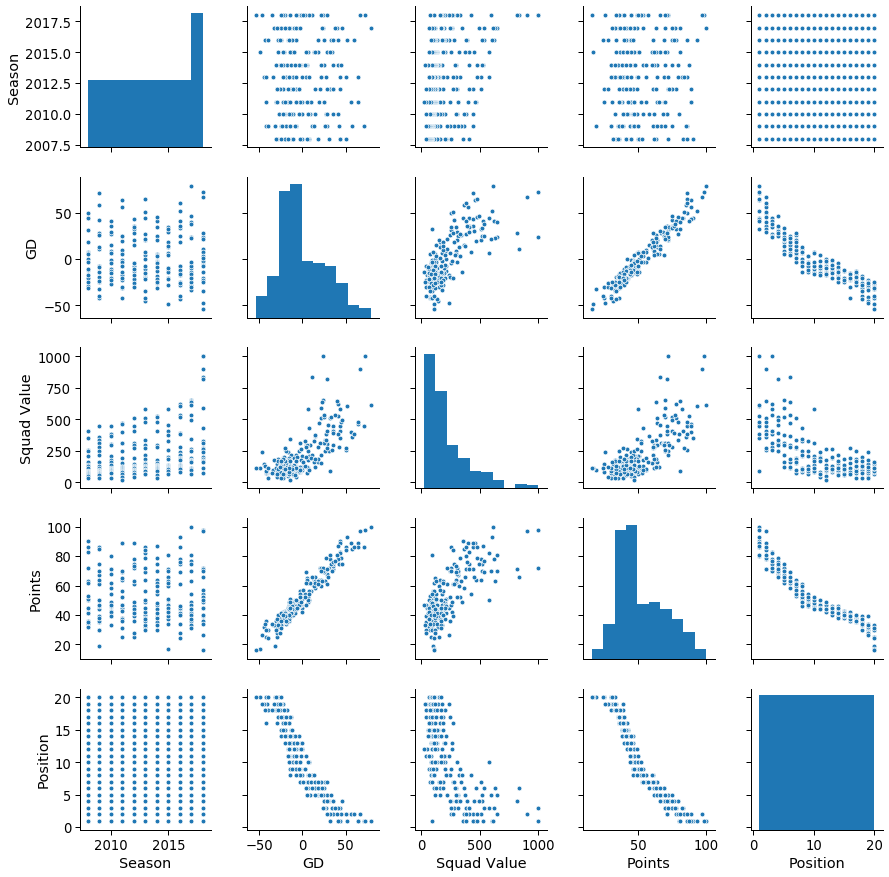

In [5]:
#sns.set_context('talk')
#Seteamos cuestiones iniciales del gráfico
#sns.set_style('white')
col_numericas = df[['Season' , 'GD' , 'Squad Value', 'Points', 'Position']]

sns.set_context("paper", font_scale =1.5)
sns.pairplot(col_numericas)

In [6]:
#Chequeamos si la pocisión en la tabla tiene mas correlacin que los puntos con el valor del equipo
corr_position = abs(df['Squad Value'].corr(df['Position'])) 
corr_points = df['Squad Value'].corr(df['Points'])

print("La correlacion entre el valor del equipo y la posicion es de "+ str(corr_position)+ ", mientras que la correlación entre los puntos del equipo y el valor del equipo es de: "+str(corr_points))
print("Es por esto que armaremos nuestro modelo para predecir cuantos puntos debes esperar para tu equipo, no la pocisión en la tabla")


La correlacion entre el valor del equipo y la posicion es de 0.6698313755033488, mientras que la correlación entre los puntos del equipo y el valor del equipo es de: 0.7392567705822437
Es por esto que armaremos nuestro modelo para predecir cuantos puntos debes esperar para tu equipo, no la pocisión en la tabla


In [7]:
#Comenzamos tomando las dos columnas que vamos a utilizar
X=df['Squad Value']
y=df['Points']

X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)



In [8]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print("This is the amount that we expect our response variable (points) to change for every unit that our predictor variable changes (squad value in m Euros). Simply, for every extra million we put into our squad value, how many extra points should we get? We find out with the .coef_ method of the model.",lm.coef_)

This is the amount that we expect our response variable (points) to change for every unit that our predictor variable changes (squad value in m Euros). Simply, for every extra million we put into our squad value, how many extra points should we get? We find out with the .coef_ method of the model. [[0.07152655]]


In [9]:
predictions = lm.predict(X_test)

datos = pd.DataFrame({'X_test':X_test[:,0], 'y_test':y_test[:,0]})



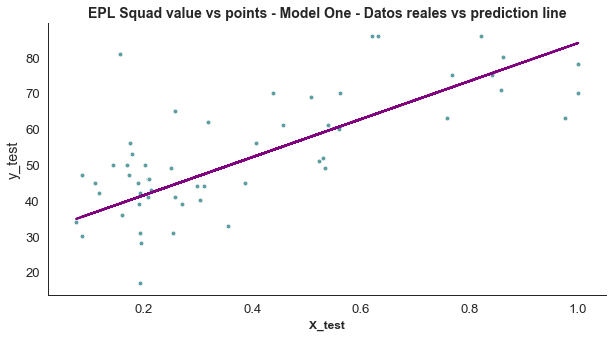

In [33]:
sns.set_style('white')
plt.figure(figsize = (10,5))

# Create scatterplot
sns.scatterplot(x = 'X_test', y = 'y_test',  data = datos, ci = None, 
           color = 'cadetblue' )
#sns.lmplot(x = 'X_test', y = 'y_test',  data = datos, ci = None)

# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel('X_test', fontsize = 12, fontweight = 'semibold')
plt.title('EPL Squad value vs points - Model One - Datos reales vs prediction line', fontsize = 14, fontweight = 'semibold')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.show()

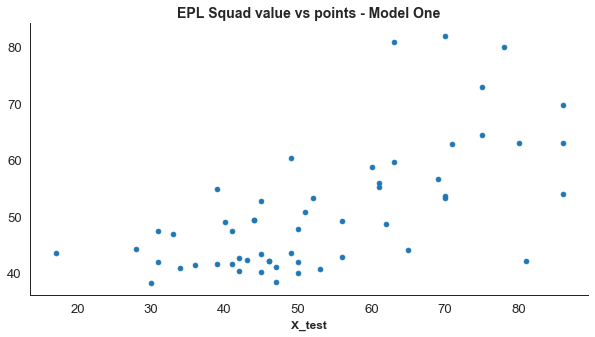

In [11]:
sns.set_style('white')
plt.figure(figsize = (10,5))

plt.scatter(y_test,predictions)
# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel('X_test', fontsize = 12, fontweight = 'semibold')
plt.title('EPL Squad value vs points - Model One', fontsize = 14, fontweight = 'semibold')

plt.show()

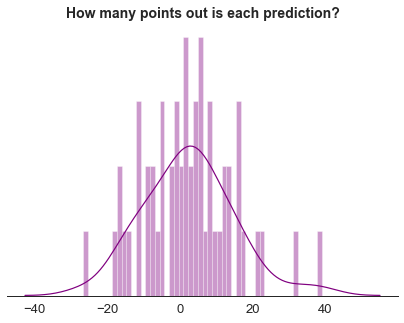

In [12]:
# Set initial plot options
sns.set_style('white')
#Seteo un buen tamaño para poder trasladarlo a una ppt o que quede bien en la notebook
plt.figure(figsize = (7,5))

# Create plot
sns.distplot( (y_test-predictions) ,bins=50 , color = 'purple', kde_kws = {'shade' :False}, hist = True)

# Add vertical line
#plt.axvline((y_test-predictions).median(), ymax = 0.95, linestyle = '--')


# Add median age of all employees
#plt.text((y_test-predictions).median() + 2, 0.04, "Median Age: " + str((y_test-predictions).median()), style = 'italic', fontsize = 10  )


# Despine plot
sns.despine(left = True)

# Add finishing touches
plt.yticks([])

plt.title('How many points out is each prediction?', fontsize = 14, fontweight = 'semibold')
plt.show()

In [13]:
print('Error Absoluto Medio:', metrics.mean_absolute_error(y_test, predictions))

Error Absoluto Medio: 9.728206663986418


In [17]:
df_a_vs_p = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})
df_a_vs_p.head()

,Actual,Predicted
0,47,40.995974
1,56,42.834207
2,49,43.510133
3,63,80.843418
4,61,55.204724


In [16]:
df_a_vs_p['Actual'].corr(df_a_vs_p['Predicted'])

0.6540205213240837

In [20]:
#Blank List
#These values will be between 0 & 1 and give a better impression of comparative buying power, hence performance in the league. 

relative_value = []

for index, team in df.iterrows():
    season = team['Season']

    teamseason = df[df['Season'] == season]
    
    maxvalue = teamseason['Squad Value'].max()
    
    tempRelativeValue = team['Squad Value'] / maxvalue
    
    relative_value.append(tempRelativeValue)

df['Relative_Value'] = relative_value

df.head()

,League,Season,Team,Squad,Average Age,Non-Homegrown,Squad Value,Avg Player Value,GD,Points,Position,Relative_Value
0,EPL,2008,Chelsea FC,28,25.6,21,406.70,14.53,44,83,3,1.000000
1,EPL,2008,Manchester United,31,24.3,20,356.10,11.49,44,90,1,0.875584
2,EPL,2008,Liverpool FC,28,23.9,24,257.23,9.19,50,86,2,0.632481
3,EPL,2008,Arsenal FC,38,21.3,30,250.85,6.6,31,72,4,0.616794
4,EPL,2008,Tottenham Hotspur,35,22.5,18,212.60,6.07,0,51,8,0.522744


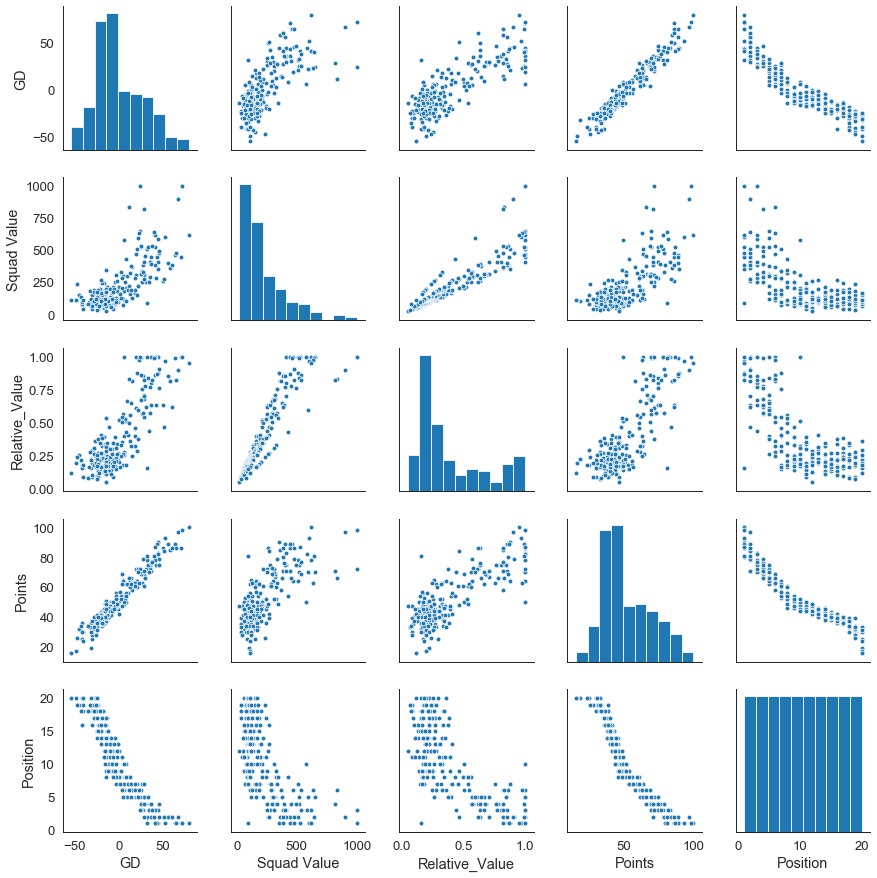

In [24]:
sns.pairplot(df[['GD', 'Squad Value', 'Relative_Value', 'Points', 'Position']])


In [29]:
#Arrancamos nuestro modelo de nuevo
X = df['Relative_Value']
y = df['Points']
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

#Create training and test sets for each of the two variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

#Create an empty model, then train it against the variables
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
print(lm.coef_/10)


[[5.31884201]]


In [32]:
predictions = lm.predict(X_test)
datos = pd.DataFrame({'X_test':X_test[:,0], 'y_test':y_test[:,0]})

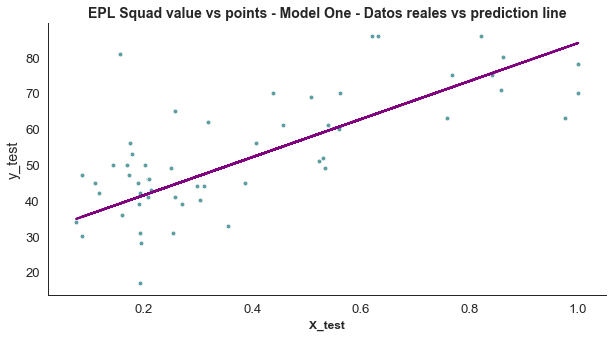

In [34]:
sns.set_style('white')
plt.figure(figsize = (10,5))

# Create scatterplot
sns.scatterplot(x = 'X_test', y = 'y_test',  data = datos, ci = None, 
           color = 'cadetblue' )
#sns.lmplot(x = 'X_test', y = 'y_test',  data = datos, ci = None)

# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel('X_test', fontsize = 12, fontweight = 'semibold')
plt.title('EPL Squad value vs points - Model One - Datos reales vs prediction line', fontsize = 14, fontweight = 'semibold')
plt.plot(X_test, predictions, color='purple', linewidth=2)
plt.show()

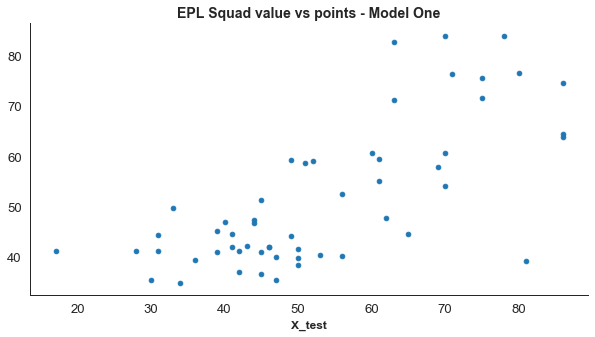

In [35]:
sns.set_style('white')
plt.figure(figsize = (10,5))

plt.scatter(y_test,predictions)
# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel('X_test', fontsize = 12, fontweight = 'semibold')
plt.title('EPL Squad value vs points - Model One', fontsize = 14, fontweight = 'semibold')

plt.show()

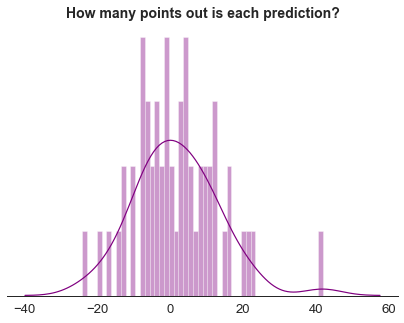

In [36]:
# Set initial plot options
sns.set_style('white')
#Seteo un buen tamaño para poder trasladarlo a una ppt o que quede bien en la notebook
plt.figure(figsize = (7,5))

# Create plot
sns.distplot( (y_test-predictions) ,bins=50 , color = 'purple', kde_kws = {'shade' :False}, hist = True)

# Add vertical line
#plt.axvline((y_test-predictions).median(), ymax = 0.95, linestyle = '--')


# Add median age of all employees
#plt.text((y_test-predictions).median() + 2, 0.04, "Median Age: " + str((y_test-predictions).median()), style = 'italic', fontsize = 10  )


# Despine plot
sns.despine(left = True)

# Add finishing touches
plt.yticks([])

plt.title('How many points out is each prediction?', fontsize = 14, fontweight = 'semibold')
plt.show()

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 8.972066563663786
